In [29]:
import pandas as pd

df = pd.read_csv("sample_data.csv")
cleaned_df = df.loc[:, ['What is your current class standing?', 'What is your gender?', 'Do you currently have a job?', 
                    'If you have a job, how much do you work per week?', 
                    'If you have a job, do you work on or off campus?', 
                    'What is your GPA?', 
                    'How satisfied are you with your current GPA?',
                    'How many classes are you taking this quarter?', 
                    'How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?']]
cleaned_df['Do you currently have a job?'].fillna(0)
cleaned_df['If you have a job, how much do you work per week?'].fillna(0)
cleaned_df.head()

,What is your current class standing?,What is your gender?,Do you currently have a job?,"If you have a job, how much do you work per week?","If you have a job, do you work on or off campus?",What is your GPA?,How satisfied are you with your current GPA?,How many classes are you taking this quarter?,"How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?"
0,Senior,Male,No,NaN,NaN,3.0-3.5,4.0,4,10-20 hours per week
1,Junior,Male,No,NaN,NaN,3.0-3.5,3.0,4,5-10 hours per week
2,Senior,Female,Yes,Between 5-10 hours,Off campus,3.5-4.0,5.0,4,10-20 hours per week
3,Junior,Male,Yes,Between 5-10 hours,Off campus,3.5-4.0,5.0,3,5-10 hours per week
4,Senior,Male,No,NaN,NaN,2.5-3.0,3.0,4,10-20 hours per week


<Axes: ylabel='Studnets who have jobs'>

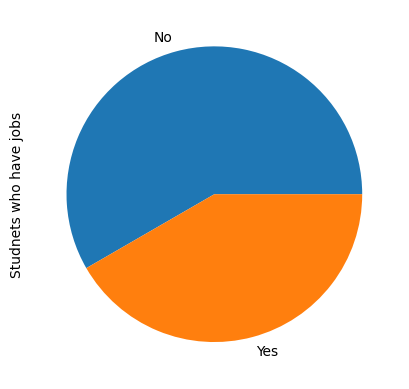

In [18]:
#See the total number of stundents that have a job and that dont have a job
jobGroup = df['Do you currently have a job?'].value_counts()
jobGroup.plot.pie(ylabel = 'Studnets who have jobs')